In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/02_Feb.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.000000,83.000000,1,4,1,1629.0,1813.0,1838.0,1507.0,1391.0,1561.0,1693.500000,1505.0
1,12.833333,83.416667,1,4,1,1579.0,1755.0,1834.0,1451.0,1364.0,1517.0,1663.083333,1469.0
2,12.666667,83.833333,1,4,1,1557.0,1712.0,1861.0,1467.0,1318.0,1505.0,1629.833333,1462.0
3,12.500000,84.250000,1,4,1,1539.0,1662.0,1876.0,1449.0,1325.0,1489.0,1590.833333,1408.0
4,12.333333,84.666667,2,4,1,1505.0,1629.0,1813.0,1438.0,1313.0,1455.0,1557.833333,1417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,13.372452,78.029950,23,5,1,1837.0,1898.0,1992.0,1722.0,1738.0,1589.0,1850.583333,1687.0
8060,13.372452,78.029950,24,5,1,1808.0,1878.0,1975.0,1684.0,1708.0,1538.0,1825.416667,1673.0
8061,13.372452,78.029950,24,5,1,1770.0,1875.0,1930.0,1581.0,1665.0,1409.0,1803.416667,1666.0
8062,13.100000,78.029950,24,5,1,1765.0,1863.0,1921.0,1535.0,1612.0,1346.0,1778.416667,1621.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   int64  
 3   B       8064 non-null   int64  
 4   C       8064 non-null   int64  
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 819.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   float64
 3   B       8064 non-null   float64
 4   C       8064 non-null   float64
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(13)
memory usage: 819.1 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4416][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.69585,-0.512899,0.263964,0.369556,-1.020331,-1.482019,-0.744600,-0.257371
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.69585,-0.723968,0.019034,0.352659,-1.253722,-1.593980,-0.925464,-0.394668
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.69585,-0.816838,-0.162552,0.466714,-1.187039,-1.784728,-0.974790,-0.544755
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.69585,-0.892823,-0.373698,0.530078,-1.262057,-1.755701,-1.040559,-0.720796
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.69585,-1.036350,-0.513055,0.263949,-1.307902,-1.805461,-1.180317,-0.869754


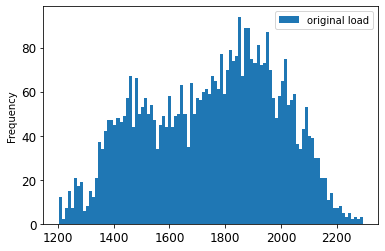

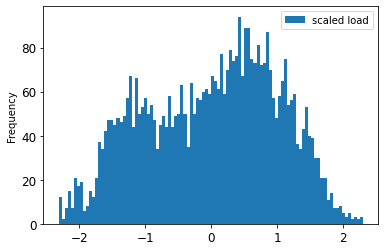

In [8]:
stlf_data[stlf_data.index <= 4416][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4416][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

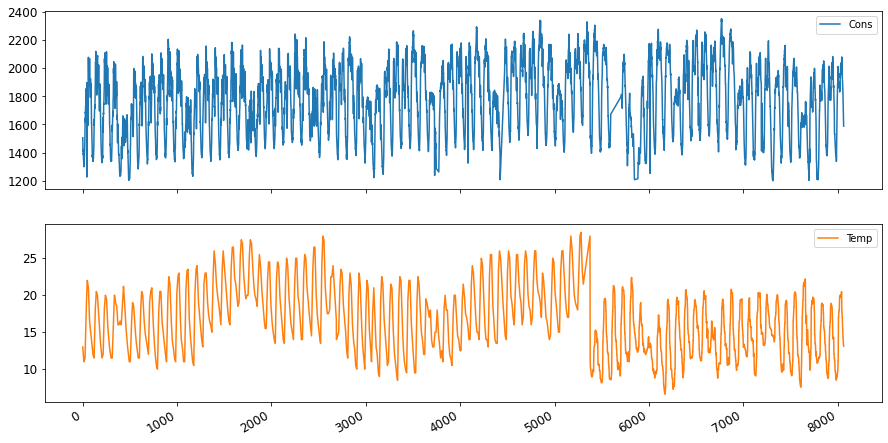

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.69585,-0.512899,0.263964,0.369556,-1.020331,-1.482019,-0.744600,-0.257371,-1.188616
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.69585,-0.723968,0.019034,0.352659,-1.253722,-1.593980,-0.925464,-0.394668,-1.218163
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.69585,-0.816838,-0.162552,0.466714,-1.187039,-1.784728,-0.974790,-0.544755,-1.446097
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.69585,-0.892823,-0.373698,0.530078,-1.262057,-1.755701,-1.040559,-0.720796,-1.408108
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.69585,-1.036350,-0.513055,0.263949,-1.307902,-1.805461,-1.180317,-0.869754,-1.530517
5,-1.530517,-1.283608,1.578763,-1.516184,-0.031792,0.69585,-1.188319,-0.724202,0.018942,-1.512119,-1.934008,-1.320075,-1.007804,-1.509412
6,-1.509412,-1.322839,1.603766,-1.516184,-0.031792,0.69585,-1.217869,-0.817106,-0.162702,-1.587137,-2.012795,-1.357070,-1.127798,-1.593832
7,-1.593832,-1.362071,1.628769,-1.516184,-0.031792,0.69585,-1.445823,-0.893119,-0.373915,-1.670491,-2.074996,-1.394065,-1.236507,-1.712020
8,-1.712020,-1.401303,1.653772,-1.371749,-0.031792,0.69585,-1.407831,-1.036699,-0.513316,-1.674659,-2.124756,-1.537934,-1.343336,-1.720462
9,-1.720462,-1.440535,1.678776,-1.371749,-0.031792,0.69585,-1.530251,-1.188724,-0.724529,-1.666323,-2.112316,-1.537934,-1.432109,-1.695136


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4407,-0.357078,1.459043,-1.279313,1.372502,-1.504799,-1.437092,-0.529784,-0.132991,0.225931,0.321667,0.379843,0.463897,-0.312101,-0.399288
4408,-0.399288,1.523241,-1.290224,1.516936,-1.504799,-1.437092,-0.628987,-0.175221,0.149894,0.288325,0.205682,0.439234,-0.361002,-0.551245
4409,-0.551245,1.587438,-1.301134,1.516936,-1.504799,-1.437092,-0.728189,-0.310354,-0.002180,0.154959,0.226415,0.295365,-0.409902,-0.597676
4410,-0.597676,1.651635,-1.312045,1.516936,-1.504799,-1.437092,-0.255395,-0.445488,-0.086665,0.146624,0.180802,0.303586,-0.455417,-0.791842
4411,-0.791842,1.715832,-1.322955,1.516936,-1.504799,-1.437092,-0.356708,-0.529947,-0.133132,-0.028419,-0.067999,0.258370,-0.514098,-0.876262
4412,-0.876262,1.780030,-1.333865,1.661370,-1.504799,-1.437092,-0.398922,-0.629186,-0.175375,-0.245140,-0.308507,0.007628,-0.576540,-0.990229
4413,-0.990229,1.844227,-1.344776,1.661370,-1.504799,-1.437092,-0.550891,-0.728425,-0.310551,-0.324326,-0.300214,-0.222562,-0.637101,-0.842494
4414,-0.842494,1.908424,-1.355686,1.661370,-1.504799,-1.437092,-0.597326,-0.255456,-0.445728,-0.157618,-0.105319,-0.160904,-0.672460,-0.876262
4415,-0.876262,1.972622,-1.366597,1.661370,-1.504799,-1.437092,-0.791510,-0.356807,-0.530213,-0.270146,-0.221427,-0.165015,-0.703305,-1.184395
4416,-1.184395,1.972622,-1.366597,-1.660618,-1.013797,-1.437092,-0.875937,-0.399036,-0.629483,-0.382674,-0.466081,-0.419868,-0.752769,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4407,-0.357078,1.459043,-1.279313,1.372502,-1.504799,-1.437092,-0.529784,-0.132991,0.225931,0.321667,0.379843,0.463897,-0.312101,-0.399288
4408,-0.399288,1.523241,-1.290224,1.516936,-1.504799,-1.437092,-0.628987,-0.175221,0.149894,0.288325,0.205682,0.439234,-0.361002,-0.551245
4409,-0.551245,1.587438,-1.301134,1.516936,-1.504799,-1.437092,-0.728189,-0.310354,-0.002180,0.154959,0.226415,0.295365,-0.409902,-0.597676
4410,-0.597676,1.651635,-1.312045,1.516936,-1.504799,-1.437092,-0.255395,-0.445488,-0.086665,0.146624,0.180802,0.303586,-0.455417,-0.791842
4411,-0.791842,1.715832,-1.322955,1.516936,-1.504799,-1.437092,-0.356708,-0.529947,-0.133132,-0.028419,-0.067999,0.258370,-0.514098,-0.876262
4412,-0.876262,1.780030,-1.333865,1.661370,-1.504799,-1.437092,-0.398922,-0.629186,-0.175375,-0.245140,-0.308507,0.007628,-0.576540,-0.990229
4413,-0.990229,1.844227,-1.344776,1.661370,-1.504799,-1.437092,-0.550891,-0.728425,-0.310551,-0.324326,-0.300214,-0.222562,-0.637101,-0.842494
4414,-0.842494,1.908424,-1.355686,1.661370,-1.504799,-1.437092,-0.597326,-0.255456,-0.445728,-0.157618,-0.105319,-0.160904,-0.672460,-0.876262
4415,-0.876262,1.972622,-1.366597,1.661370,-1.504799,-1.437092,-0.791510,-0.356807,-0.530213,-0.270146,-0.221427,-0.165015,-0.703305,-1.184395
4416,-1.184395,1.972622,-1.366597,-1.660618,-1.013797,-1.437092,-0.875937,-0.399036,-0.629483,-0.382674,-0.466081,-0.419868,-0.752769,-1.184395


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-1.188616
1,-1.218163
2,-1.446097
3,-1.408108
4,-1.530517
...,...
4412,-0.990229
4413,-0.842494
4414,-0.876262
4415,-1.184395


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.036660,-1.087449,1.453748,-1.660618,-0.031792,0.695850,-0.512899,0.263964,0.369556,-1.020331,-1.482019,-0.744600,-0.257371
1,-1.188616,-1.126681,1.478751,-1.660618,-0.031792,0.695850,-0.723968,0.019034,0.352659,-1.253722,-1.593980,-0.925464,-0.394668
2,-1.218163,-1.165913,1.503754,-1.660618,-0.031792,0.695850,-0.816838,-0.162552,0.466714,-1.187039,-1.784728,-0.974790,-0.544755
3,-1.446097,-1.205144,1.528757,-1.660618,-0.031792,0.695850,-0.892823,-0.373698,0.530078,-1.262057,-1.755701,-1.040559,-0.720796
4,-1.408108,-1.244376,1.553760,-1.516184,-0.031792,0.695850,-1.036350,-0.513055,0.263949,-1.307902,-1.805461,-1.180317,-0.869754
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,-0.876262,1.780030,-1.333865,1.661370,-1.504799,-1.437092,-0.398922,-0.629186,-0.175375,-0.245140,-0.308507,0.007628,-0.576540
4413,-0.990229,1.844227,-1.344776,1.661370,-1.504799,-1.437092,-0.550891,-0.728425,-0.310551,-0.324326,-0.300214,-0.222562,-0.637101
4414,-0.842494,1.908424,-1.355686,1.661370,-1.504799,-1.437092,-0.597326,-0.255456,-0.445728,-0.157618,-0.105319,-0.160904,-0.672460
4415,-0.876262,1.972622,-1.366597,1.661370,-1.504799,-1.437092,-0.791510,-0.356807,-0.530213,-0.270146,-0.221427,-0.165015,-0.703305


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4417, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4417) & (stlf_data.index <=5377)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4417,1451.0,25.916667,37.250000,1.0,2.0,0.0,1516.0,1620.0,1578.0,1618.0,1615.0,1606.0,1573.166667
4418,1440.0,25.833333,38.500000,1.0,2.0,0.0,1551.0,1609.0,1690.0,1613.0,1603.0,1581.0,1552.333333
4419,1441.0,25.750000,39.750000,1.0,2.0,0.0,1543.0,1563.0,1666.0,1603.0,1571.0,1556.0,1533.583333
4420,1409.0,25.666667,41.000000,2.0,2.0,0.0,1470.0,1543.0,1656.0,1574.0,1553.0,1522.0,1513.000000
4421,1405.0,25.583333,42.250000,2.0,2.0,0.0,1451.0,1516.0,1620.0,1551.0,1508.0,1512.0,1495.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,1882.0,27.816901,35.985915,24.0,4.0,1.0,1958.0,1969.0,2014.0,1841.0,1817.0,1622.0,1968.083333
5374,1895.0,27.908451,35.492958,24.0,4.0,1.0,1984.0,2021.0,1997.0,1864.0,1839.0,1636.0,1959.583333
5375,1898.0,28.000000,35.000000,24.0,4.0,1.0,1953.0,2036.0,1972.0,1837.0,1810.0,1626.0,1953.416667
5376,1585.0,11.042452,89.736565,1.0,6.0,1.0,1765.0,1891.0,1904.0,1655.0,1592.0,1646.0,1795.000000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4417,-1.803798,1.311767,-1.791239,-1.658081,-0.951822,-1.532459,-1.522574,-1.081913,-1.248582,-0.981624,-0.955302,-0.995097,-1.348241
4418,-1.849662,1.289460,-1.699124,-1.658081,-0.951822,-1.532459,-1.377140,-1.127503,-0.785094,-1.002678,-1.005345,-1.098233,-1.439229
4419,-1.845492,1.267153,-1.607010,-1.658081,-0.951822,-1.532459,-1.410382,-1.318155,-0.884413,-1.044787,-1.138791,-1.201370,-1.521118
4420,-1.978914,1.244846,-1.514895,-1.513750,-0.951822,-1.532459,-1.713716,-1.401047,-0.925796,-1.166901,-1.213854,-1.341636,-1.611015
4421,-1.995592,1.222539,-1.422780,-1.513750,-0.951822,-1.532459,-1.792666,-1.512951,-1.074774,-1.263750,-1.401513,-1.382890,-1.689264
4422,-2.112336,1.200232,-1.330666,-1.513750,-0.951822,-1.532459,-1.838374,-1.367890,-1.120295,-1.343755,-1.409854,-1.453023,-1.773701
4423,-2.821140,1.177926,-1.238551,-1.513750,-0.951822,-1.532459,-1.834219,-1.401047,-1.310656,-1.369020,-1.384832,-1.461274,-1.903269
4424,-2.753364,1.155619,-1.146437,-1.369419,-0.951822,-1.532459,-1.967187,-1.703602,-1.393422,-1.423761,-1.472406,-1.502529,-2.019641
4425,-2.685589,1.133312,-1.054322,-1.369419,-0.951822,-1.532459,-1.983808,-1.782350,-1.505156,-1.486924,-1.476577,-1.498403,-2.120270
4426,-2.617813,1.111005,-0.962207,-1.369419,-0.951822,-1.532459,-2.100156,-1.827940,-1.360316,-1.512189,-1.493257,-1.510780,-2.227721


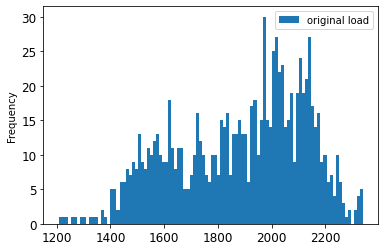

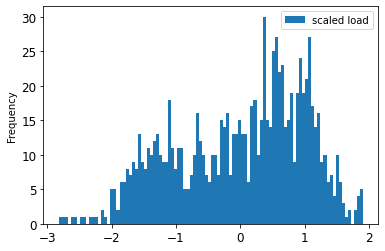

In [19]:
stlf_data[(stlf_data.index >=4417) & (stlf_data.index <=5377)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4417) & (valid.index <=5377)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4417,-1.803798,1.311767,-1.791239,-1.658081,-0.951822,-1.532459,-1.522574,-1.081913,-1.248582,-0.981624,-0.955302,-0.995097,-1.348241,-1.849662
4418,-1.849662,1.289460,-1.699124,-1.658081,-0.951822,-1.532459,-1.377140,-1.127503,-0.785094,-1.002678,-1.005345,-1.098233,-1.439229,-1.845492
4419,-1.845492,1.267153,-1.607010,-1.658081,-0.951822,-1.532459,-1.410382,-1.318155,-0.884413,-1.044787,-1.138791,-1.201370,-1.521118,-1.978914
4420,-1.978914,1.244846,-1.514895,-1.513750,-0.951822,-1.532459,-1.713716,-1.401047,-0.925796,-1.166901,-1.213854,-1.341636,-1.611015,-1.995592
4421,-1.995592,1.222539,-1.422780,-1.513750,-0.951822,-1.532459,-1.792666,-1.512951,-1.074774,-1.263750,-1.401513,-1.382890,-1.689264,-2.112336
4422,-2.112336,1.200232,-1.330666,-1.513750,-0.951822,-1.532459,-1.838374,-1.367890,-1.120295,-1.343755,-1.409854,-1.453023,-1.773701,-2.821140
4423,-2.821140,1.177926,-1.238551,-1.513750,-0.951822,-1.532459,-1.834219,-1.401047,-1.310656,-1.369020,-1.384832,-1.461274,-1.903269,-2.753364
4424,-2.753364,1.155619,-1.146437,-1.369419,-0.951822,-1.532459,-1.967187,-1.703602,-1.393422,-1.423761,-1.472406,-1.502529,-2.019641,-2.685589
4425,-2.685589,1.133312,-1.054322,-1.369419,-0.951822,-1.532459,-1.983808,-1.782350,-1.505156,-1.486924,-1.476577,-1.498403,-2.120270,-2.617813
4426,-2.617813,1.111005,-0.962207,-1.369419,-0.951822,-1.532459,-2.100156,-1.827940,-1.360316,-1.512189,-1.493257,-1.510780,-2.227721,-2.550038


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5368,0.514406,1.697897,-1.702757,1.517204,0.163667,0.652546,0.201861,0.758289,1.416473,0.690074,0.383330,-0.495916,0.636758,0.310104
5369,0.310104,1.722403,-1.739084,1.517204,0.163667,0.652546,0.359761,0.551059,1.089549,0.538484,0.324948,-0.512418,0.569427,0.418510
5370,0.418510,1.746909,-1.775411,1.517204,0.163667,0.652546,0.575835,0.480601,0.924017,0.437424,0.241544,-0.561923,0.526116,0.289257
5371,0.289257,1.771415,-1.811738,1.517204,0.163667,0.652546,0.638164,0.376986,0.808145,0.327943,0.099757,-0.528920,0.481714,0.097463
5372,0.097463,1.795921,-1.848065,1.661535,0.163667,0.652546,0.517661,0.207057,0.762624,0.151088,-0.079561,-0.714566,0.424573,-0.006773
5373,-0.006773,1.820428,-1.884391,1.661535,0.163667,0.652546,0.314053,0.364552,0.555710,-0.042610,-0.112923,-0.929089,0.376532,0.047430
5374,0.047430,1.844934,-1.920718,1.661535,0.163667,0.652546,0.422090,0.580071,0.485359,0.054239,-0.021179,-0.871333,0.339409,0.059938
5375,0.059938,1.869440,-1.957045,1.661535,0.163667,0.652546,0.293277,0.642240,0.381902,-0.059453,-0.142114,-0.912588,0.312476,-1.245094
5376,-1.245094,-2.669808,2.076585,-1.658081,1.279156,0.652546,-0.487913,0.041273,0.100499,-0.825824,-1.051217,-0.830078,-0.379398,-1.328483
5377,-1.328483,-2.669808,2.076585,-1.658081,1.279156,0.652546,-0.633347,-0.145233,0.187403,-0.990046,-1.155472,-0.949717,-0.510421,-1.328483


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4417,-1.849662
4418,-1.845492
4419,-1.978914
4420,-1.995592
4421,-2.112336
...,...
5373,0.047430
5374,0.059938
5375,-1.245094
5376,-1.328483


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4417,-1.803798,1.311767,-1.791239,-1.658081,-0.951822,-1.532459,-1.522574,-1.081913,-1.248582,-0.981624,-0.955302,-0.995097,-1.348241
4418,-1.849662,1.289460,-1.699124,-1.658081,-0.951822,-1.532459,-1.377140,-1.127503,-0.785094,-1.002678,-1.005345,-1.098233,-1.439229
4419,-1.845492,1.267153,-1.607010,-1.658081,-0.951822,-1.532459,-1.410382,-1.318155,-0.884413,-1.044787,-1.138791,-1.201370,-1.521118
4420,-1.978914,1.244846,-1.514895,-1.513750,-0.951822,-1.532459,-1.713716,-1.401047,-0.925796,-1.166901,-1.213854,-1.341636,-1.611015
4421,-1.995592,1.222539,-1.422780,-1.513750,-0.951822,-1.532459,-1.792666,-1.512951,-1.074774,-1.263750,-1.401513,-1.382890,-1.689264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,-0.006773,1.820428,-1.884391,1.661535,0.163667,0.652546,0.314053,0.364552,0.555710,-0.042610,-0.112923,-0.929089,0.376532
5374,0.047430,1.844934,-1.920718,1.661535,0.163667,0.652546,0.422090,0.580071,0.485359,0.054239,-0.021179,-0.871333,0.339409
5375,0.059938,1.869440,-1.957045,1.661535,0.163667,0.652546,0.293277,0.642240,0.381902,-0.059453,-0.142114,-0.912588,0.312476
5376,-1.245094,-2.669808,2.076585,-1.658081,1.279156,0.652546,-0.487913,0.041273,0.100499,-0.825824,-1.051217,-0.830078,-0.379398


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
369/369 [==============================] - 5s 13ms/step - loss: 0.1848 - val_loss: 0.1669
Epoch 2/300
369/369 [==============================] - 4s 11ms/step - loss: 0.0987 - val_loss: 0.0604
Epoch 3/300
369/369 [==============================] - 4s 11ms/step - loss: 0.0715 - val_loss: 0.0432
Epoch 4/300
369/369 [==============================] - 4s 11ms/step - loss: 0.0590 - val_loss: 0.0469
Epoch 5/300
369/369 [==============================] - 5s 12ms/step - loss: 0.0559 - val_loss: 0.0542
Epoch 6/300
369/369 [==============================] - 5s 12ms/step - loss: 0.0521 - val_loss: 0.0583
Epoch 7/300
369/369 [==============================] - 5s 13ms/step - loss: 0.0543 - val_loss: 0.0360
Epoch 8/300
369/369 [==============================] - 4s 12ms/step - loss: 0.0480 - val_loss: 0.0353
Epoch 9/300
369/369 [==============================] - 4s 12ms/step - loss: 0.0491 - val_loss: 0.0402
Epoch 10/300
369/369 [==============================] - 5s 12ms/step - loss: 0.047

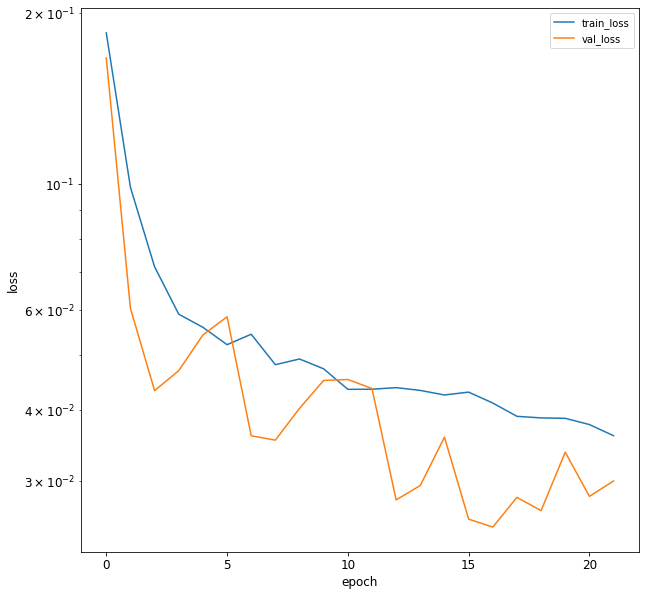

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5378][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5378,1538.0,10.577452,90.370747,1.0,6.0,1.0,1667.0,1838.0,1919.0,1588.0,1551.0,1614.0,1733.250000
5379,1502.0,10.112452,91.004930,1.0,6.0,1.0,1660.0,1811.0,1903.0,1578.0,1550.0,1596.0,1699.833333
5380,1515.0,10.112452,91.004930,2.0,6.0,1.0,1585.0,1765.0,1891.0,1548.0,1491.0,1575.0,1668.500000
5381,1521.0,10.112452,91.004930,2.0,6.0,1.0,1565.0,1730.0,1846.0,1531.0,1501.0,1537.0,1641.416667
5382,1498.0,9.962452,91.334265,2.0,6.0,1.0,1538.0,1667.0,1838.0,1502.0,1513.0,1548.0,1613.083333
5383,1487.0,9.812452,91.663600,2.0,6.0,1.0,1502.0,1660.0,1811.0,1498.0,1508.0,1542.0,1586.083333
5384,1441.0,9.812452,91.663600,3.0,6.0,1.0,1515.0,1585.0,1765.0,1493.0,1498.0,1518.0,1559.083333
5385,1437.0,9.812452,91.663600,3.0,6.0,1.0,1521.0,1565.0,1730.0,1469.0,1480.0,1503.0,1534.666667
5386,1434.0,9.532452,90.961965,3.0,6.0,1.0,1498.0,1538.0,1667.0,1447.0,1439.0,1495.0,1515.250000
5387,1431.0,9.252452,90.260330,3.0,6.0,1.0,1487.0,1502.0,1660.0,1440.0,1419.0,1492.0,1496.166667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 5378 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2686 non-null   float64
 1   Temp    2686 non-null   float64
 2   Hum     2686 non-null   float64
 3   A       2686 non-null   float64
 4   B       2686 non-null   float64
 5   C       2686 non-null   float64
 6   D       2686 non-null   float64
 7   E       2686 non-null   float64
 8   F       2686 non-null   float64
 9   G       2686 non-null   float64
 10  H       2686 non-null   float64
 11  I       2686 non-null   float64
 12  J       2686 non-null   float64
dtypes: float64(13)
memory usage: 293.8 KB


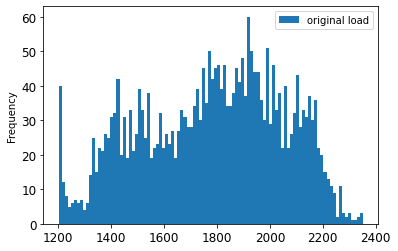

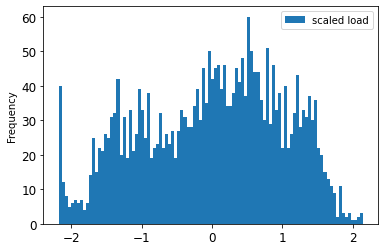

In [33]:
stlf_data[stlf_data.index >= 5378][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5378][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5378,-0.912029,-1.000315,0.764248,-1.663654,1.000745,0.688625,-0.427119,0.215299,0.519501,-0.728171,-0.876685,-0.673685,-0.185889,-1.047317
5379,-1.047317,-1.127160,0.802428,-1.663654,1.000745,0.688625,-0.453424,0.113839,0.459380,-0.765614,-0.880384,-0.740655,-0.316827,-0.998463
5380,-0.998463,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.735255,-0.059019,0.414289,-0.877946,-1.098633,-0.818787,-0.439602,-0.975915
5381,-0.975915,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.810410,-0.190542,0.245198,-0.941600,-1.061642,-0.960169,-0.545724,-1.062349
5382,-1.062349,-1.168078,0.822255,-1.519096,1.000745,0.688625,-0.911869,-0.427282,0.215138,-1.050187,-1.017252,-0.919242,-0.656744,-1.103687
5383,-1.103687,-1.208996,0.842083,-1.519096,1.000745,0.688625,-1.047149,-0.453586,0.113684,-1.065164,-1.035748,-0.941566,-0.762540,-1.276555
5384,-1.276555,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.998298,-0.735420,-0.059164,-1.083886,-1.072740,-1.030859,-0.868335,-1.291587
5385,-1.291587,-1.208996,0.842083,-1.374538,1.000745,0.688625,-0.975751,-0.810576,-0.190679,-1.173751,-1.139324,-1.086668,-0.964009,-1.302861
5386,-1.302861,-1.285376,0.799841,-1.374538,1.000745,0.688625,-1.062180,-0.912036,-0.427405,-1.256127,-1.290989,-1.116432,-1.040090,-1.314135
5387,-1.314135,-1.361756,0.757600,-1.374538,1.000745,0.688625,-1.103515,-1.047316,-0.453708,-1.282338,-1.364971,-1.127594,-1.114865,-1.374263


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8059,-0.352087,-0.237878,0.021282,1.516620,0.500745,0.688625,0.211699,0.440766,0.793803,-0.226425,-0.184947,-0.766699,0.273865,-0.404699
8060,-0.404699,-0.237878,0.021282,1.661178,0.500745,0.688625,0.102724,0.365610,0.729924,-0.368711,-0.295921,-0.956448,0.175253,-0.431005
8061,-0.431005,-0.237878,0.021282,1.661178,0.500745,0.688625,-0.040071,0.354337,0.560834,-0.754381,-0.454984,-1.436401,0.089049,-0.600115
8062,-0.600115,-0.312199,0.021282,1.661178,0.500745,0.688625,-0.058859,0.309243,0.527016,-0.926623,-0.651038,-1.670797,-0.008910,-0.724129
8063,-0.724129,-0.312199,-0.070827,1.661178,0.500745,0.688625,-0.351964,0.211541,0.440592,-0.945344,-0.732419,-1.704282,-0.110134,-0.724129


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5378,-1.047317
5379,-0.998463
5380,-0.975915
5381,-1.062349
5382,-1.103687
...,...
8059,-0.404699
8060,-0.431005
8061,-0.600115
8062,-0.724129


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5378,-0.912029,-1.000315,0.764248,-1.663654,1.000745,0.688625,-0.427119,0.215299,0.519501,-0.728171,-0.876685,-0.673685,-0.185889
5379,-1.047317,-1.127160,0.802428,-1.663654,1.000745,0.688625,-0.453424,0.113839,0.459380,-0.765614,-0.880384,-0.740655,-0.316827
5380,-0.998463,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.735255,-0.059019,0.414289,-0.877946,-1.098633,-0.818787,-0.439602
5381,-0.975915,-1.127160,0.802428,-1.519096,1.000745,0.688625,-0.810410,-0.190542,0.245198,-0.941600,-1.061642,-0.960169,-0.545724
5382,-1.062349,-1.168078,0.822255,-1.519096,1.000745,0.688625,-0.911869,-0.427282,0.215138,-1.050187,-1.017252,-0.919242,-0.656744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,-0.352087,-0.237878,0.021282,1.516620,0.500745,0.688625,0.211699,0.440766,0.793803,-0.226425,-0.184947,-0.766699,0.273865
8060,-0.404699,-0.237878,0.021282,1.661178,0.500745,0.688625,0.102724,0.365610,0.729924,-0.368711,-0.295921,-0.956448,0.175253
8061,-0.431005,-0.237878,0.021282,1.661178,0.500745,0.688625,-0.040071,0.354337,0.560834,-0.754381,-0.454984,-1.436401,0.089049
8062,-0.600115,-0.312199,0.021282,1.661178,0.500745,0.688625,-0.058859,0.309243,0.527016,-0.926623,-0.651038,-1.670797,-0.008910


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2686, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2686,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-0.97179174],
       [-1.0735316 ],
       [-1.0949987 ],
       ...,
       [-0.5098245 ],
       [-0.68433905],
       [-0.7786758 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 6900][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1727.379296
dtype: float64
Cons    238.469537
dtype: float64


In [42]:
load_mean=1727.379296
load_std=238.469537
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2686, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2686, 1)


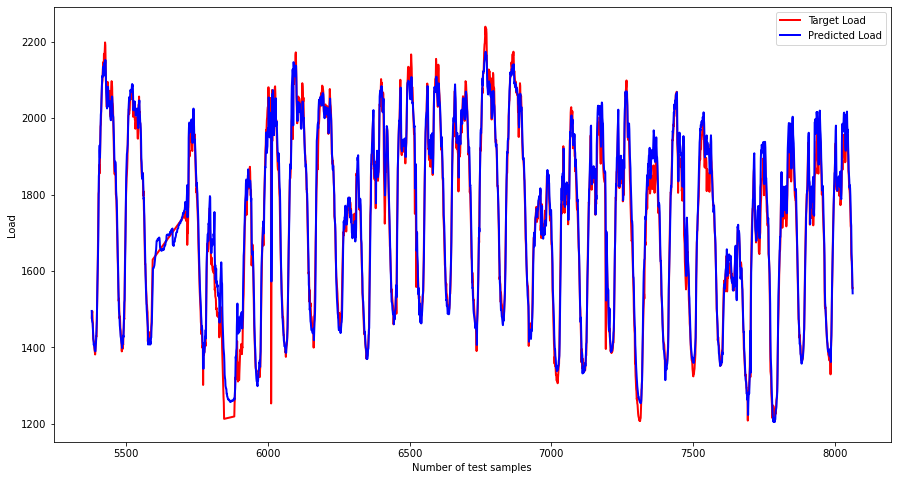

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.7924439746883323


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.840017
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5378  147661.400592
5379  148828.840624
5380  149367.239688
5381  147304.835984
5382  146319.448733
...             ...
8059  162985.949964
8060  162359.656276
8061  158325.666201
8062  155369.058720
8063  155370.505720

[2686 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+1
5378  324.370187
5379  320.472725
5380  806.447884
5381  101.640302
5382  251.034447
...          ...
8059  352.852852
8060    4.290498
8061  463.600454
8062   90.033764
8063  169.204100

[2686 rows x 1 columns]
y_t+1    1912.684845
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    43.734253
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2688):
    b=a[i]
    print(b)

[1495.6365]
[1471.3746]
[1466.2554]
[1463.9598]
[1448.3396]
[1436.2935]
[1413.9469]
[1406.7173]
[1408.4656]
[1404.0215]
[1401.2444]
[1391.6682]
[1390.7509]
[1390.1475]
[1405.6766]
[1413.0198]
[1430.7783]
[1448.9458]
[1469.6804]
[1525.6454]
[1564.4033]
[1610.4762]
[1640.3718]
[1682.1484]
[1775.0442]
[1848.1989]
[1858.1586]
[1914.5176]
[1929.136]
[1896.8232]
[1932.7958]
[1978.7256]
[2008.9272]
[2016.772]
[2039.2806]
[2057.7305]
[2080.8237]
[2110.3877]
[2107.001]
[2110.808]
[2129.3887]
[2135.708]
[2133.5686]
[2111.1584]
[2144.6665]
[2143.011]
[2133.1614]
[2143.6511]
[2152.3435]
[2145.298]
[2100.4995]
[2068.5576]
[2054.9927]
[2044.9344]
[2025.4923]
[2054.6035]
[2075.233]
[2082.0596]
[2072.2705]
[2057.2966]
[2035.893]
[2033.8079]
[2029.7046]
[2039.6523]
[2044.2551]
[2036.5392]
[1999.9711]
[1995.186]
[1994.5975]
[2032.0212]
[2048.933]
[2056.616]
[2056.388]
[2041.4268]
[2011.7698]
[2007.7715]
[2002.6792]
[1980.18]
[1956.271]
[1919.4446]
[1890.8789]
[1881.7794]
[1860.5155]
[1886.2184]
[1878.00

[1453.972]
[1445.6345]
[1444.9861]
[1445.5398]
[1446.096]
[1438.7977]
[1437.2131]
[1442.7422]
[1440.0062]
[1449.5854]
[1419.2286]
[1442.2943]
[1464.2554]
[1473.4077]
[1495.6926]
[1534.3572]
[1608.5547]
[1722.034]
[1802.6002]
[1884.9049]
[1940.7985]
[1949.5526]
[1967.1888]
[1980.0574]
[1986.1156]
[1973.6449]
[2019.1168]
[2031.4224]
[2048.2917]
[2045.9337]
[2039.079]
[2048.3025]
[2052.1191]
[2052.2446]
[2056.7188]
[2050.4414]
[2051.5767]
[2032.8931]
[2055.7703]
[2056.2842]
[2063.8193]
[2065.]
[2065.6177]
[2062.2375]
[2050.5032]
[2018.1538]
[2006.71]
[2001.0146]
[1999.906]
[2005.3386]
[2017.1389]
[2029.6189]
[2024.6595]
[2010.823]
[2015.1741]
[2022.6145]
[2009.4]
[2011.2484]
[2026.5598]
[2016.7832]
[2013.0852]
[1977.7291]
[1960.6798]
[1975.7133]
[2008.0173]
[2012.8333]
[2037.778]
[2051.2102]
[2025.7484]
[2012.0468]
[2007.8011]
[1993.6102]
[1971.6786]
[1941.1583]
[1900.8185]
[1894.6132]
[1868.2996]
[1864.2753]
[1875.6669]
[1861.2365]
[1830.1593]
[1810.4249]
[1798.7278]
[1746.5054]
[1729.47

[2081.9553]
[2080.105]
[2084.9556]
[2089.3096]
[2080.087]
[2069.5508]
[2078.1746]
[2076.547]
[2063.534]
[2062.4282]
[2061.3774]
[2035.7941]
[2033.1818]
[1984.0155]
[1975.8147]
[2006.3174]
[2023.1012]
[2051.9058]
[2064.143]
[2061.848]
[2028.2826]
[2019.1729]
[2029.4044]
[2022.5549]
[2000.8259]
[1966.4797]
[1936.78]
[1919.6631]
[1892.1576]
[1896.1421]
[1896.4347]
[1885.647]
[1862.3955]
[1832.1923]
[1819.4496]
[1786.7217]
[1758.6488]
[1723.4755]
[1685.668]
[1669.5059]
[1619.3755]
[1597.0425]
[1567.6511]
[1549.1168]
[1537.1606]
[1525.2003]
[1516.8225]
[1507.819]
[1478.812]
[1415.1469]
[1445.0399]
[1437.1299]
[1429.3767]
[1435.3713]
[1443.1245]
[1429.8881]
[1422.4526]
[1442.7008]
[1448.9479]
[1443.3549]
[1464.323]
[1490.6372]
[1516.0935]
[1575.9319]
[1618.4095]
[1659.1943]
[1686.6896]
[1700.4382]
[1664.5144]
[1684.3081]
[1693.6389]
[1716.1154]
[1740.8224]
[1742.7502]
[1751.3525]
[1753.6277]
[1763.6626]
[1751.8536]
[1741.0839]
[1753.3157]
[1758.7515]
[1760.5442]
[1784.8063]
[1786.5383]
[1790

[1210.0785]
[1212.1252]
[1230.6406]
[1236.6239]
[1238.5992]
[1244.4735]
[1265.0793]
[1271.112]
[1284.7487]
[1327.1831]
[1409.4042]
[1475.4723]
[1534.4161]
[1563.6119]
[1587.6895]
[1617.6166]
[1640.2361]
[1661.461]
[1689.3767]
[1689.1012]
[1716.751]
[1772.5477]
[1824.9268]
[1858.895]
[1803.7515]
[1772.5331]
[1785.6505]
[1742.6184]
[1764.6151]
[1794.9988]
[1807.8207]
[1820.8391]
[1811.4841]
[1795.7833]
[1759.3396]
[1798.6272]
[1806.7234]
[1817.8928]
[1818.1208]
[1822.4922]
[1777.8234]
[1751.0883]
[1779.3385]
[1798.5607]
[1878.1765]
[1919.5842]
[1940.1858]
[1959.0525]
[1979.2667]
[1987.3387]
[1981.1135]
[1983.5956]
[1910.3391]
[1979.709]
[1985.9528]
[1971.3341]
[1949.0146]
[1897.7069]
[1868.0442]
[1890.6301]
[1965.568]
[1999.1437]
[2003.666]
[2003.5359]
[1956.441]
[1946.6216]
[1933.8702]
[1896.7518]
[1871.5698]
[1853.2495]
[1832.7892]
[1811.0791]
[1814.3392]
[1815.1896]
[1814.2249]
[1777.9371]
[1738.8469]
[1709.2921]
[1678.2324]
[1637.9609]
[1597.505]
[1553.3086]
[1531.1691]
[1489.3081]
[

IndexError: index 2686 is out of bounds for axis 0 with size 2686